In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projects/ML/SMS Classifier/spam.csv", encoding='ISO-8859-1')

In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2959,ham,Sir send to group mail check it.,NaN,NaN,NaN
3251,ham,Come to medical college at 7pm ......forward i...,NaN,NaN,NaN
4591,ham,Right it wasnt you who phoned it was someone w...,NaN,NaN,NaN
554,ham,IÛ÷ll have a look at the frying pan in case i...,NaN,NaN,NaN
5345,ham,Wat Ì_ doing now?,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

# Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1, inplace = True)

In [ ]:
df.rename(columns = {"v1" : "target", "v2" : "text"}, inplace = True)

In [ ]:
df.sample(5)

,target,text
3522,ham,Try neva mate!!
3214,ham,I want snow. It's just freezing and windy.
5008,ham,My mobile number.pls sms ur mail id.convey reg...
1199,ham,NEFT Transaction with reference number &lt;#&...
4025,ham,Oh ok.. Wat's ur email?


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df["target"] = encoder.fit_transform(df["target"])

In [ ]:
df.sample(5)

,target,text
2880,0,Printer is cool. I mean groovy. Wine is groovying
2342,1,Double your mins & txts on Orange or 1/2 price...
3275,0,Lol your right. What diet? Everyday I cheat an...
1819,0,Dunno dat's wat he told me. Ok lor...
4208,0,I want kfc its Tuesday. Only buy 2 meals ONLY ...


In [ ]:
encoder.classes_

array(['ham', 'spam'], dtype=object)

In [ ]:
df.isnull().sum()

,0
target,0
text,0


In [ ]:
dup = df[df.duplicated()]
dup

,target,text
102,0,As per your request 'Melle Melle (Oru Minnamin...
153,0,As per your request 'Melle Melle (Oru Minnamin...
206,0,"As I entered my cabin my PA said, '' Happy B'd..."
222,0,"Sorry, I'll call later"
325,0,No calls..messages..missed calls
...,...,...
5524,1,You are awarded a SiPix Digital Camera! call 0...
5535,0,"I know you are thinkin malaria. But relax, chi..."
5539,0,Just sleeping..and surfing
5553,0,Hahaha..use your brain dear


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5169 non-null   int64 
 1   text    5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


# EDA

In [ ]:
df["target"].value_counts()

,count
target,
0,4516
1,653


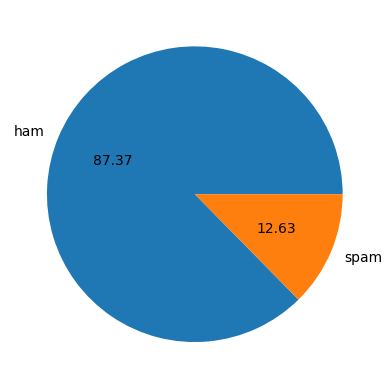

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(), labels = ["ham", "spam"], autopct = "%0.2f")
plt.show()

In [ ]:
import nltk

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
df["num_caracters"] = df["text"].apply(len)

In [ ]:
df["num-words"] = df["text"].apply(lambda x : len(nltk.word_tokenize(x)))

In [ ]:
df["num-sentences"] = df["text"].apply(lambda x : len(nltk.sent_tokenize(x)))

In [ ]:
df.sample(5)

,target,text,num_caracters,num-words,num-sentences
1880,0,Just seeing your missed call my dear brother. ...,64,15,2
1693,0,Was gr8 to see that message. So when r u leavi...,96,24,4
4097,0,I think just yourself Û_Thanks and see you tomo,48,9,1
2609,0,"Awesome, text me when you're restocked",38,8,1
1044,1,We know someone who you know that fancies you....,101,22,3


In [ ]:
df.describe()

,target,num_caracters,num-words,num-sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [ ]:
# Describe of ham messages
df[df["target"] == 0].describe()

,target,num_caracters,num-words,num-sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [ ]:
# Describe of ham messages
df[df["target"] == 1].describe()

,target,num_caracters,num-words,num-sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_caracters', ylabel='Count'>

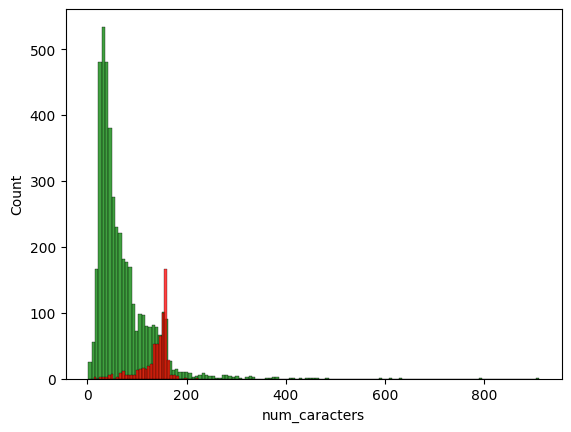

In [ ]:
sns.histplot(df[df["target"] == 0]["num_caracters"], color = 'green')
sns.histplot(df[df["target"] == 1]["num_caracters"], color = 'red')

<Axes: xlabel='num-words', ylabel='Count'>

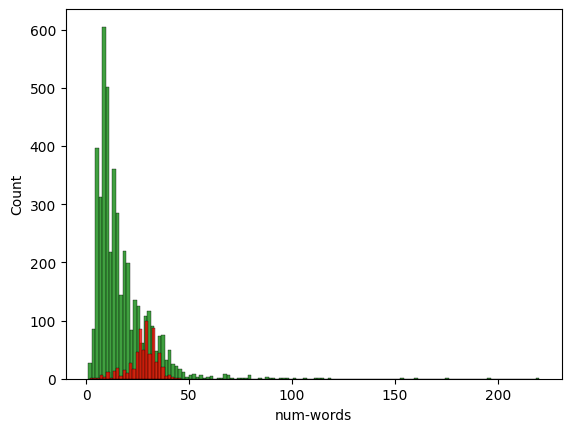

In [ ]:
sns.histplot(df[df["target"] == 0]["num-words"], color = 'green')
sns.histplot(df[df["target"] == 1]["num-words"], color = 'red')

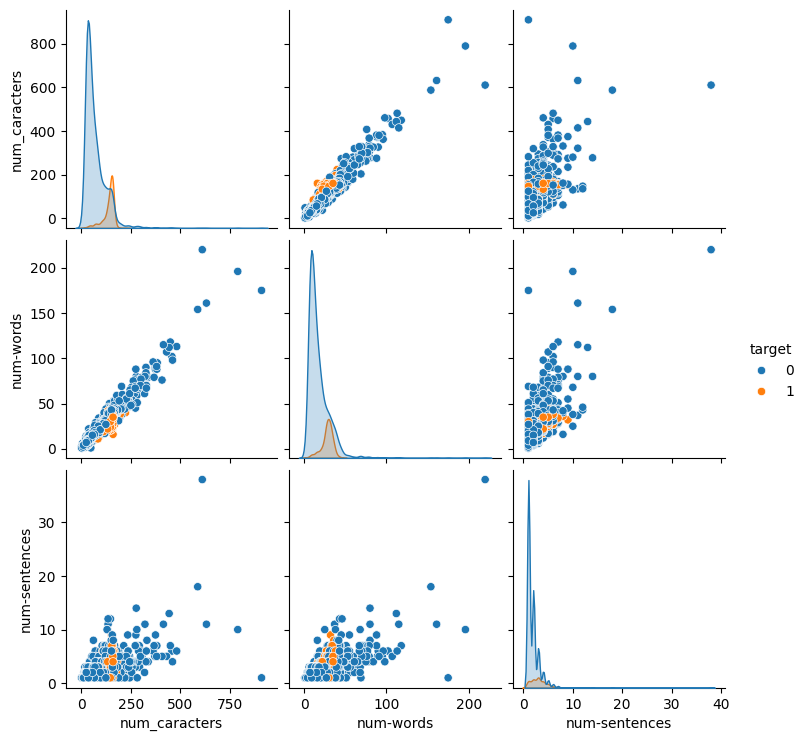

In [ ]:
sns.pairplot(df, hue = "target")

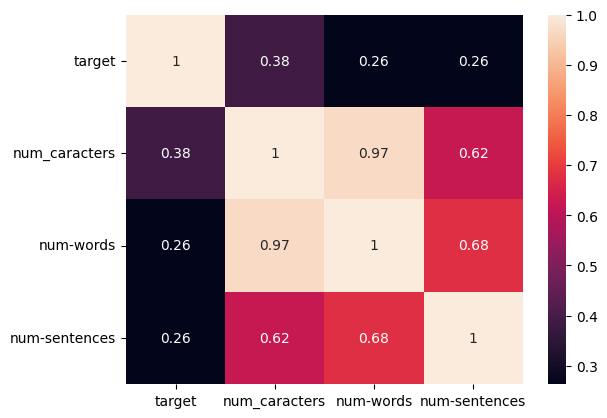

In [ ]:
sns.heatmap(df.drop(["text"], axis = 1).corr(), annot = True)
plt.yticks(rotation = "horizontal")
plt.show()

# Data Preprocessing
* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def transform_text(text):
    text = nltk.word_tokenize(text.lower())

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [ ]:
t = df["text"][24]
t

'Ffffffffff. Alright no way I can meet up with you sooner?'

In [ ]:
transform_text(t)

'ffffffffff alright way meet sooner'

In [ ]:
df["transformed_text"] = df["text"].apply(transform_text)

In [ ]:
df.sample(5)

,target,text,num_caracters,num-words,num-sentences,transformed_text
550,0,Imagine you finally get to sink into that bath...,281,59,3,imagin final get sink bath put pace mayb even ...
1306,1,Enjoy the jamster videosound gold club with yo...,163,27,4,enjoy jamster videosound gold club credit 2 ne...
1082,0,Send to someone else :-),24,7,1,send someon els
4958,0,"What i mean was i left too early to check, cos...",65,18,1,mean left earli check co work
4100,1,GSOH? Good with SPAM the ladies?U could b a ma...,167,36,6,gsoh good spam ladi u could b male gigolo 2 jo...


In [ ]:
# Word cloud
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = "white")

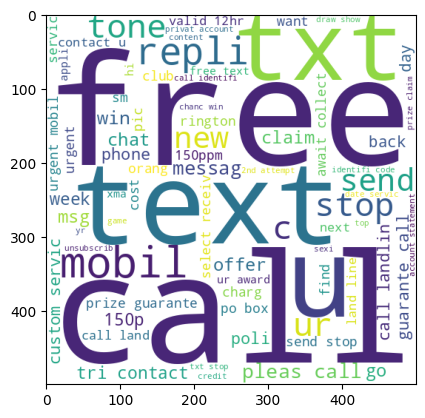

In [ ]:
spam_wc = wc.generate(df[df["target"] == 1]["transformed_text"].str.cat(sep = " "))
plt.imshow(spam_wc)

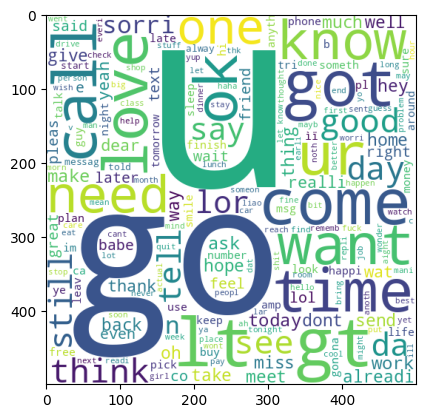

In [ ]:
ham_wc = wc.generate(df[df["target"] == 0]["transformed_text"].str.cat(sep = " "))
plt.imshow(ham_wc)

In [ ]:
spam_corpus = []
for msg in df[df["target"] == 1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

In [ ]:
from collections import Counter
temp = pd.DataFrame(Counter(spam_corpus).most_common(30))

In [ ]:
temp

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


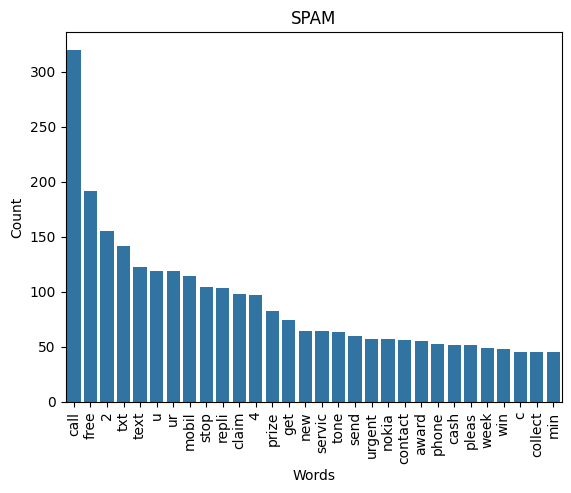

In [ ]:
sns.barplot(data = temp, x = temp[0], y = temp[1])
plt.title("SPAM")
plt.xticks(rotation = "vertical")
plt.xlabel("Words")
plt.ylabel("Count")
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df["target"] == 0]["transformed_text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35404

In [ ]:
from collections import Counter
temp = pd.DataFrame(Counter(ham_corpus).most_common(30))

In [ ]:
temp

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


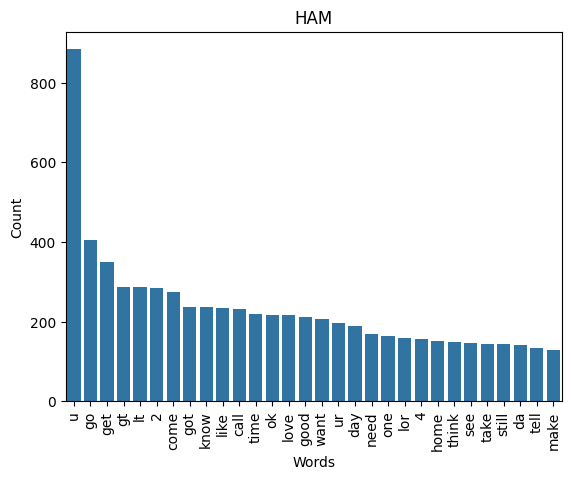

In [ ]:
sns.barplot(data = temp, x = temp[0], y = temp[1])
plt.title("HAM")
plt.xticks(rotation = "vertical")
plt.xlabel("Words")
plt.ylabel("Count")
plt.show()

# Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [ ]:
# x = cv.fit_transform(df["transformed_text"]).toarray()
x = tfidf.fit_transform(df["transformed_text"]).toarray()

In [ ]:
y = df["target"].values

In [ ]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.2, random_state = 2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score as acs, precision_score as prs, confusion_matrix as cmx
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print(acs(y_test, y_pred1))
print(prs(y_test, y_pred1))
print(cmx(y_test, y_pred1))

0.8762088974854932
0.5231481481481481
[[793 103]
 [ 25 113]]


In [ ]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print(acs(y_test, y_pred2))
print(prs(y_test, y_pred2))
print(cmx(y_test, y_pred2))

0.9593810444874274
1.0
[[896   0]
 [ 42  96]]


In [ ]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print(acs(y_test, y_pred3))
print(prs(y_test, y_pred3))
print(cmx(y_test, y_pred3))

0.9700193423597679
0.9734513274336283
[[893   3]
 [ 28 110]]


In [ ]:
# selecting (tfidf, mnb)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = acs(y_test,y_pred)
    precision = prs(y_test,y_pred)

    return accuracy,precision

In [ ]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision, "\n")

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828 

For  KN
Accuracy -  0.9003868471953579
Precision -  1.0 

For  NB
Accuracy -  0.9593810444874274
Precision -  1.0 

For  DT
Accuracy -  0.9361702127659575
Precision -  0.8461538461538461 

For  LR
Accuracy -  0.9516441005802708
Precision -  0.94 

For  RF
Accuracy -  0.971953578336557
Precision -  1.0 

For  AdaBoost
Accuracy -  0.9245647969052224
Precision -  0.8409090909090909 

For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282 

For  ETC
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771 

For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239 

For  xgb
Accuracy -  0.9729206963249516
Precision -  0.9435483870967742 



In [ ]:
performance_df01 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df01

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
10,xgb,0.972921,0.943548
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595
3,DT,0.936170,0.846154


In [ ]:
performance_df02 = pd.melt(performance_df01, id_vars = "Algorithm")
performance_df02

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.971954
3,ETC,Accuracy,0.972921
4,SVC,Accuracy,0.972921
5,xgb,Accuracy,0.972921
6,LR,Accuracy,0.951644
7,GBDT,Accuracy,0.952611
8,BgC,Accuracy,0.958414
9,DT,Accuracy,0.936170


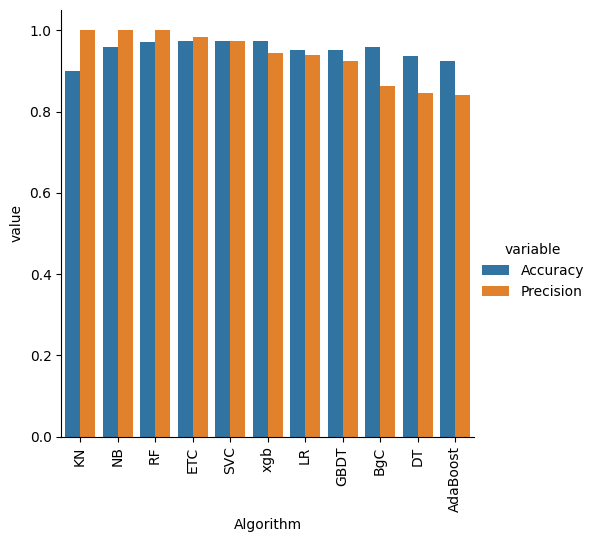

In [ ]:
sns.catplot(data = performance_df02, x = "Algorithm", y = "value", hue = "variable", kind = "bar")
plt.xticks(rotation = "vertical")
plt.show()

# Model Imporvement

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [ ]:
# x = cv.fit_transform(df["transformed_text"]).toarray()
x = tfidf.fit_transform(df["transformed_text"]).toarray()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [ ]:
y = df["target"].values

In [ ]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.2, random_state = 2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score as acs, precision_score as prs, confusion_matrix as cmx
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print(acs(y_test, y_pred1))
print(prs(y_test, y_pred1))
print(cmx(y_test, y_pred1))

0.8723404255319149
0.5128205128205128
[[782 114]
 [ 18 120]]


In [ ]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print(acs(y_test, y_pred2))
print(prs(y_test, y_pred2))
print(cmx(y_test, y_pred2))

0.9787234042553191
0.9461538461538461
[[889   7]
 [ 15 123]]


In [ ]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print(acs(y_test, y_pred3))
print(prs(y_test, y_pred3))
print(cmx(y_test, y_pred3))

0.9835589941972921
0.991869918699187
[[895   1]
 [ 16 122]]


In [ ]:
# selecting (tfidf, mnb)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = acs(y_test,y_pred)
    precision = prs(y_test,y_pred)

    return accuracy,precision

In [ ]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9690522243713733, 0.9274193548387096)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision, "\n")

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9690522243713733
Precision -  0.9274193548387096 

For  KN
Accuracy -  0.9052224371373307
Precision -  0.9761904761904762 

For  NB
Accuracy -  0.9787234042553191
Precision -  0.9461538461538461 

For  DT
Accuracy -  0.9284332688588007
Precision -  0.82 

For  LR
Accuracy -  0.9671179883945842
Precision -  0.9642857142857143 

For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829 

For  AdaBoost
Accuracy -  0.9245647969052224
Precision -  0.8488372093023255 

For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659 

For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406 

For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192 

For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213 



In [ ]:
performance_df01 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df01

,Algorithm,Accuracy,Precision
5,RF,0.975822,0.982906
1,KN,0.905222,0.976190
8,ETC,0.974855,0.974576
4,LR,0.967118,0.964286
2,NB,0.978723,0.946154
0,SVC,0.969052,0.927419
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217
6,AdaBoost,0.924565,0.848837


In [ ]:
performance_df02 = pd.melt(performance_df01, id_vars = "Algorithm")
performance_df02

,Algorithm,variable,value
0,RF,Accuracy,0.975822
1,KN,Accuracy,0.905222
2,ETC,Accuracy,0.974855
3,LR,Accuracy,0.967118
4,NB,Accuracy,0.978723
5,SVC,Accuracy,0.969052
6,xgb,Accuracy,0.967118
7,GBDT,Accuracy,0.946809
8,BgC,Accuracy,0.958414
9,AdaBoost,Accuracy,0.924565


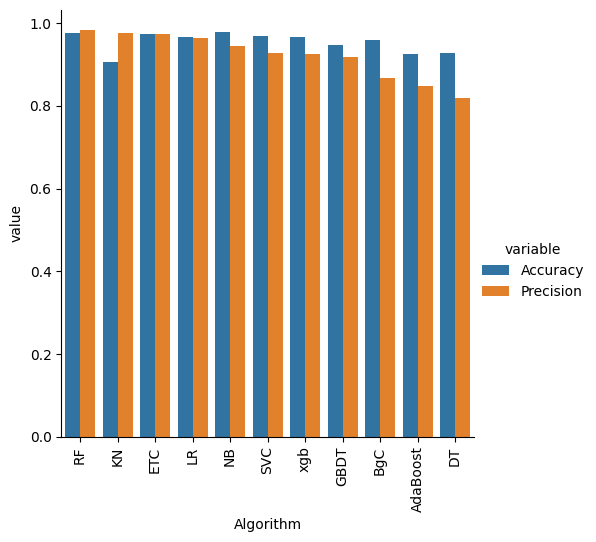

In [ ]:
sns.catplot(data = performance_df02, x = "Algorithm", y = "value", hue = "variable", kind = "bar")
plt.xticks(rotation = "vertical")
plt.show()

# Files export

In [ ]:
import pickle

In [ ]:
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))